In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy
import requests
import time
import matplotlib
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
from citipy import citipy

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

laramie us
airai pw
say ne
suez eg
ushuaia ar
vaini to
bluff nz
bluff nz
ribeira grande pt
isangel vu
damietta eg
hoshcha ua
jalu ly
mercedes ar
tarata pe
mar del plata ar
mar del plata ar
grand centre ca
vaini to
butaritari ki
santa cruz cr
hobart au
new norfolk au
bystryy istok ru
finale ligure it
ust-kan ru
dikson ru
praia da vitoria pt
barentsburg sj
cidreira br
subang id
coihaique cl
qaanaaq gl
ushuaia ar
bethel us
provideniya ru
ushuaia ar
daoukro ci
mount gambier au
belushya guba ru
norman wells ca
victoria sc
ust-kuyga ru
hasaki jp
punta arenas cl
yellowknife ca
punta arenas cl
nadvoitsy ru
souillac mu
ponta do sol cv
hobart au
chokurdakh ru
rikitea pf
yellowknife ca
albany au
iqaluit ca
kaitangata nz
yellowknife ca
albany au
zhezkazgan kz
mahebourg mu
ushuaia ar
punta arenas cl
richards bay za
luderitz na
punta arenas cl
taolanaro mg
san cristobal ec
punta arenas cl
henties bay na
rikitea pf
kamaishi jp
samusu ws
albany au
ushuaia ar
chokurdakh ru
dandong cn
mar del plata ar
b

busselton au
hermanus za
busselton au
vaini to
leningradskiy ru
anapskaya ru
yellowknife ca
sao filipe cv
ribeira grande pt
rikitea pf
mataura pf
busselton au
mayo ca
dudinka ru
port elizabeth za
saleaula ws
lebu cl
east london za
faanui pf
carnarvon au
hami cn
ushuaia ar
qaanaaq gl
carnarvon au
punta arenas cl
mataura pf
asfi ma
castro cl
cabo san lucas mx
hermanus za
ushuaia ar
norman wells ca
new norfolk au
tura ru
ushuaia ar
khatanga ru
belushya guba ru
mogadishu so
bambous virieux mu
bethel us
thompson ca
saskylakh ru
cape town za
mehamn no
hermanus za
pangnirtung ca
kabinda cd
port elizabeth za
vao nc
port-gentil ga
cape town za
wagar sd
mercedes ar
lompoc us
hermanus za
kuroiso jp
vrsac rs
butaritari ki
witu ke
mataura pf
illoqqortoormiut gl
arraial do cabo br
berlevag no
ilebo cd
pangnirtung ca
marcona pe
tutoia br
ancud cl
rikitea pf
rikitea pf
volsk ru
nizhneyansk ru
kazalinsk kz
kirensk ru
douglas us
chuy uy
mataura pf
nizhneyansk ru
namibe ao
gamba ga
busselton au
port alfr

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b54b73f27e11e1e8a9882cbe071ec0c2


In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
    
        city_weather = requests.get(city_url).json()
        
#        print(city_url)
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laramie
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | say
Processing Record 4 of Set 1 | suez
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | damietta
Processing Record 11 of Set 1 | hoshcha
Processing Record 12 of Set 1 | jalu
Processing Record 13 of Set 1 | mercedes
Processing Record 14 of Set 1 | tarata
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | grand centre
City not found. Skipping...
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | santa cruz
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | bystryy istok
Processing Record 22 of Set 1 | finale ligure
Processing Record

Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | nanakuli
Processing Record 42 of Set 4 | vila
Processing Record 43 of Set 4 | port elizabeth
City not found. Skipping...
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | sola
Processing Record 46 of Set 4 | nabire
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | poronaysk
Processing Record 49 of Set 4 | sarkand
Processing Record 50 of Set 4 | abu kamal
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | novyy urengoy
Processing Record 4 of Set 5 | yeppoon
Processing Record 5 of Set 5 | mataura
Processing Record 6 of Set 5 | muros
Processing Record 7 of Set 5 | aklavik
Processing Record 8 of Set 5 | imeni karla libknekhta
Processing Record 9 of Set 5 | talara
Processing Record 10 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 5 | gamba
Processing Record 12 of Set 5 | keshan
City not fou

Processing Record 30 of Set 8 | thano bula khan
City not found. Skipping...
Processing Record 31 of Set 8 | anapskaya
Processing Record 32 of Set 8 | sao filipe
Processing Record 33 of Set 8 | mayo
Processing Record 34 of Set 8 | dudinka
Processing Record 35 of Set 8 | saleaula
City not found. Skipping...
Processing Record 36 of Set 8 | khatanga
Processing Record 37 of Set 8 | mogadishu
Processing Record 38 of Set 8 | pangnirtung
Processing Record 39 of Set 8 | kabinda
Processing Record 40 of Set 8 | vao
Processing Record 41 of Set 8 | port-gentil
Processing Record 42 of Set 8 | wagar
Processing Record 43 of Set 8 | kuroiso
Processing Record 44 of Set 8 | vrsac
Processing Record 45 of Set 8 | witu
Processing Record 46 of Set 8 | berlevag
Processing Record 47 of Set 8 | ilebo
Processing Record 48 of Set 8 | tutoia
Processing Record 49 of Set 8 | volsk
Processing Record 50 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 1 of Set 9 | kirensk
Processing Record 2 of Set 9

Processing Record 20 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 12 | caxito
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | del rio
Processing Record 24 of Set 12 | ussel
Processing Record 25 of Set 12 | bazarnyye mataki
Processing Record 26 of Set 12 | thinadhoo
Processing Record 27 of Set 12 | nara
Processing Record 28 of Set 12 | tadine
Processing Record 29 of Set 12 | rio grande
Processing Record 30 of Set 12 | aras
Processing Record 31 of Set 12 | kosgi
City not found. Skipping...
Processing Record 32 of Set 12 | port hedland
Processing Record 33 of Set 12 | misratah
Processing Record 34 of Set 12 | najran
Processing Record 35 of Set 12 | alofi
Processing Record 36 of Set 12 | spirit river
Processing Record 37 of Set 12 | aran
Processing Record 38 of Set 12 | shestakovo
Processing Record 39 of Set 12 | el balyana
City not found. Skipping...
Processing Record 40 of Set 12 | puerto quijarro
Processing Record 41 of Set 12 

In [8]:
# 6.2.7 Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)


city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laramie,41.31,-105.59,73.99,23,1,5.82,US,2020-06-17 18:54:18
1,Airai,-8.93,125.41,55.53,100,27,4.79,TL,2020-06-17 18:54:31
2,Say,13.10,2.37,100.40,33,20,9.17,NE,2020-06-17 18:57:01
3,Suez,29.97,32.53,83.57,36,0,22.66,EG,2020-06-17 18:57:01
4,Ushuaia,-54.80,-68.30,39.20,69,40,0.89,AR,2020-06-17 18:57:01
5,Vaini,-21.20,-175.20,69.80,83,75,8.05,TO,2020-06-17 18:56:47
6,Bluff,-46.60,168.33,39.00,83,9,3.00,NZ,2020-06-17 18:52:49
7,Ribeira Grande,38.52,-28.70,68.00,72,40,9.17,PT,2020-06-17 18:57:02
8,Isangel,-19.55,169.27,71.60,83,20,9.17,VU,2020-06-17 18:57:02
9,Damietta,31.42,31.81,86.00,66,0,13.87,EG,2020-06-17 18:57:02


In [9]:
len(city_data_df)


564

In [10]:
# Get the current column order

city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [11]:
# Define or create a variable for anew column order using tolist(). This is a list

new_column_order = sorted(city_data_df.columns.tolist())

new_column_order


['City',
 'Cloudiness',
 'Country',
 'Date',
 'Humidity',
 'Lat',
 'Lng',
 'Max Temp',
 'Wind Speed']

In [12]:
# convert the city_data_df order to the new column order
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Laramie,1,US,2020-06-17 18:54:18,23,41.31,-105.59,73.99,5.82
1,Airai,27,TL,2020-06-17 18:54:31,100,-8.93,125.41,55.53,4.79
2,Say,20,NE,2020-06-17 18:57:01,33,13.10,2.37,100.40,9.17
3,Suez,0,EG,2020-06-17 18:57:01,36,29.97,32.53,83.57,22.66
4,Ushuaia,40,AR,2020-06-17 18:57:01,69,-54.80,-68.30,39.20,0.89
...,...,...,...,...,...,...,...,...,...
559,Portree,9,GB,2020-06-17 18:59:50,76,57.41,-6.19,60.01,8.01
560,Vyborg,0,RU,2020-06-17 18:59:50,56,60.71,28.75,73.40,8.05
561,Emerald,90,AU,2020-06-17 18:59:51,72,-23.53,148.17,60.80,9.17
562,Ejura,100,GH,2020-06-17 18:59:51,93,7.39,-1.36,75.74,6.02


In [13]:
#check the data types using the dtypes

city_data_df.dtypes

City           object
Cloudiness      int64
Country        object
Date           object
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

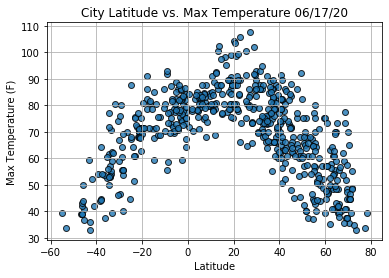

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


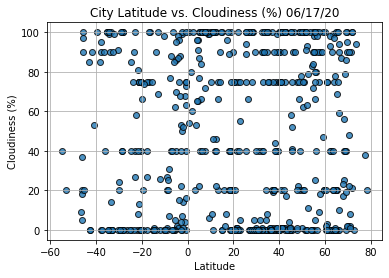

In [17]:
# Change the y-axis variable to “cloudiness,” the title
# to “Cloudiness (%),” and the y-axis label to “Cloudiness (%).”


# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


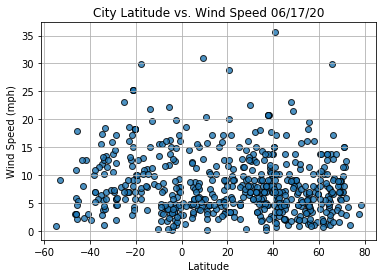

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
#To create a new DataFrame from a current DataFrame, we use the 
#loc method on the current DataFrame(city_data_df). The loc method accesses a group of rows and columns in
#the current DataFrame by an index, labels, or a Boolean


index13 = city_data_df.loc[13]

index13

City                       Tarata
Cloudiness                      0
Country                        BO
Date          2020-06-17 18:57:03
Humidity                       20
Lat                        -17.62
Lng                        -66.02
Max Temp                     82.4
Wind Speed                   5.82
Name: 13, dtype: object

In [21]:
#Filter the DataFrame based on a value of a row. Filter the city_data_df DataFrame

city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
559     True
560     True
561    False
562     True
563    False
Name: Lat, Length: 564, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Laramie,1,US,2020-06-17 18:54:18,23,41.31,-105.59,73.99,5.82
2,Say,20,NE,2020-06-17 18:57:01,33,13.10,2.37,100.40,9.17
3,Suez,0,EG,2020-06-17 18:57:01,36,29.97,32.53,83.57,22.66
7,Ribeira Grande,40,PT,2020-06-17 18:57:02,72,38.52,-28.70,68.00,9.17
9,Damietta,0,EG,2020-06-17 18:57:02,66,31.42,31.81,86.00,13.87


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

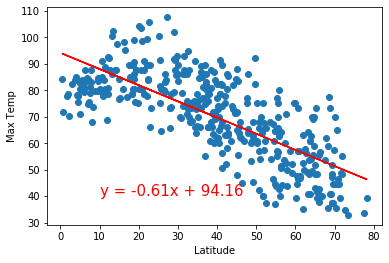

In [26]:
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regr Northern Hemi for Max Temp', 'Max Temp',(10,40))

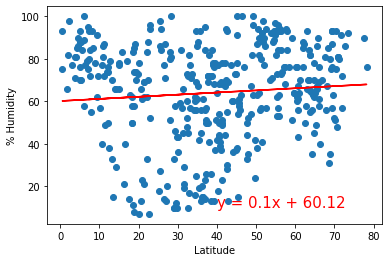

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linr Regr on the Northern Hemi for % Humidity', '% Humidity',(40,10))

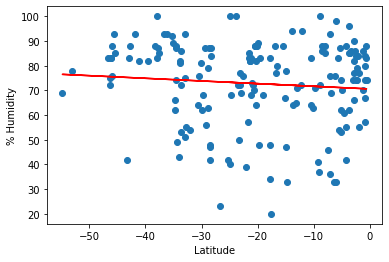

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linr Regre Southern Hemifor % Humidity', '% Humidity',(-50,15))

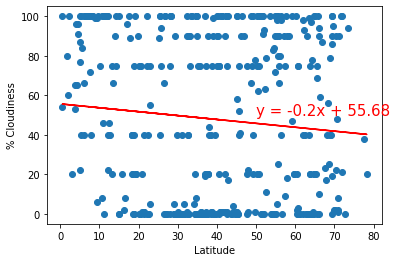

In [32]:
# Skill Drill

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linr Regr on the Northern Hemi for % Cloudiness', '% Cloudiness',(50,50))

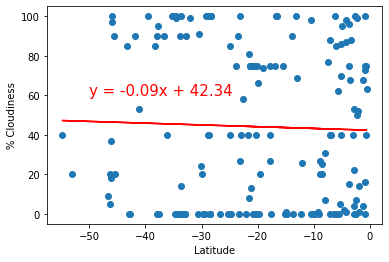

In [34]:
# Linear regression on the Southern Hemisphere-Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Regre on the Southern Hemi for % Cloudiness', '% Cloudiness',(-50,60))

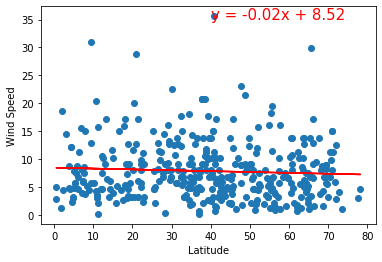

In [35]:
# Linear regression on the Northern Hemisphere-Wind Speed

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linr Regr on the Northern Hemi for Wind Speed', 'Wind Speed',(40,35))